In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms

from bounds import *
import dgp
from vset import *
import estimation, utils, experiments, vset, plots
import pandas as pd



In [3]:
Dx, Du = 5, 0
nD = Dx+Du

dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    't_coeffs': 4*np.random.rand(nD) - 3,
    'lambda': 2,
    'model': 'LR'
}

msm_dgp = set_dgp_config(dgp, 'MSM')
data = generate_data(msm_dgp)


## Test learning outcome probabilities

In [3]:
msm_dgp = set_dgp_config(dgp, 'MSM')
data = generate_data(msm_dgp)
estimation.estimate_bounds(msm_dgp, data, id_method='MSM', est_method='plugin', K=5)

outcome regression error: 0.01198478560525648
propensitiy error: 0.011519916102224923
outcome regression error: 0.010573691908639691
propensitiy error: 0.010126114879080593
outcome regression error: 0.011543918665760235
propensitiy error: 0.01193065493342641
outcome regression error: 0.017611460144330515
propensitiy error: 0.013796645804080902
outcome regression error: 0.0133791509659824
propensitiy error: 0.01107926588930836


,Rs_down,Rs_up,Rd_down,Rd_up,Rs_coverage,Rd_coverage,R_oracle,metric,id_method,est_method
0,-0.401721,0.159464,-0.290498,0.038007,1.0,1.0,-0.011503,m_y=1,MSM,plugin
1,-0.270371,0.297667,-0.100413,0.175683,1.0,1.0,0.042967,m_y=0,MSM,plugin
2,-0.501540,0.417576,-0.170528,0.086564,1.0,1.0,-0.027626,m_a=0,MSM,plugin
3,-0.224978,0.029857,-0.224978,0.029857,1.0,1.0,-0.022834,m_a=1,MSM,plugin
4,-0.365936,0.225336,-0.197947,0.057347,1.0,1.0,-0.023000,m_u,MSM,plugin


In [84]:
estimation.estimate_bounds(msm_dgp, data, id_method='MSM', est_method='plugin', K=5)

outcome regression error: 0.043218950581498154
propensitiy error: 0.026068173306555392
outcome regression error: 0.03883126286322675
propensitiy error: 0.025846728054586564
outcome regression error: 0.04162230822009172
propensitiy error: 0.024802039095536528
outcome regression error: 0.039635756080474094
propensitiy error: 0.02578407892389513
outcome regression error: 0.03992138284299188
propensitiy error: 0.025476313405033636


,Rs_down,Rs_up,Rd_down,Rd_up,Rs_coverage,Rd_coverage,R_oracle,metric,id_method,est_method
0,-0.545193,-0.338356,-0.508254,-0.377225,1.0,1.0,-0.449353,m_y=1,MSM,plugin
1,-0.550948,-0.342820,-0.514499,-0.381328,1.0,1.0,-0.458090,m_y=0,MSM,plugin
2,-0.280651,0.218070,-0.195899,0.133319,1.0,1.0,0.001760,m_a=0,MSM,plugin
3,-0.027843,0.057846,-0.027843,0.057846,1.0,1.0,0.007186,m_a=1,MSM,plugin
4,-0.084671,0.085471,-0.028803,0.029603,1.0,1.0,0.002100,m_u,MSM,plugin


# Coverage sample size experiment 
- Construct 95% bootstrap CI around plug-in estimates of the regret. Plot as a function of sample size.
- Also plot coverage as a function of sample size.

In [172]:
Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 20000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    't_coeffs': 4*np.random.rand(nD) - 3,
    'lambda': 1.5,
    'model': 'LR'
}

msm_dgp = set_dgp_config(dgp, 'MSM')
Ns = [100, 300, 600, 900, 1200, 1500, msm_dgp['N']-1]
coveragedf = experiments.estimation_coverage_experiment(msm_dgp, Ns, Nsims=25)



outcome regression error: 0.16918901483168353
propensitiy error: 0.1139718002792659
outcome regression error: 0.17205899786263706
propensitiy error: 0.15140491764412276
outcome regression error: 0.14173965771137065
propensitiy error: 0.12680491180796688
outcome regression error: 0.1926996190092413
propensitiy error: 0.13788373527891318
outcome regression error: 0.11653007260289083
propensitiy error: 0.10775363932009811
outcome regression error: 0.20607432669963904
propensitiy error: 0.1155893085884111
outcome regression error: 0.13604331752068471
propensitiy error: 0.0894832582455489
outcome regression error: 0.15841775959666352
propensitiy error: 0.11594253879701225
outcome regression error: 0.1464973788471045
propensitiy error: 0.15426775770813017
outcome regression error: 0.22430902337282413
propensitiy error: 0.07433460800316474
outcome regression error: 0.14692649426515264
propensitiy error: 0.12435045772802825
outcome regression error: 0.13956057027032867
propensitiy error: 0.095

outcome regression error: 0.21982204069073846
propensitiy error: 0.1725122008886089
outcome regression error: 0.20471309932554904
propensitiy error: 0.1536367633749774
outcome regression error: 0.256583269287739
propensitiy error: 0.10536904065442773
outcome regression error: 0.34041867497283795
propensitiy error: 0.10641694453243525
outcome regression error: 0.2573227855027139
propensitiy error: 0.15568664750175387
outcome regression error: 0.17641450255692775
propensitiy error: 0.1827459712429921
outcome regression error: 0.2912693644356473
propensitiy error: 0.2058615298876084
outcome regression error: 0.29198374352503514
propensitiy error: 0.17240838731335864
outcome regression error: 0.21833657743331178
propensitiy error: 0.13826396960514287
outcome regression error: 0.21374387863436867
propensitiy error: 0.09369024495928577
outcome regression error: 0.13496184819672044
propensitiy error: 0.07608514274362127
outcome regression error: 0.11020834747955874
propensitiy error: 0.079564

outcome regression error: 0.228924331290715
propensitiy error: 0.06782898078745685
outcome regression error: 0.20787192206064908
propensitiy error: 0.09565668121740782
outcome regression error: 0.2923103407343266
propensitiy error: 0.1356363942757915
outcome regression error: 0.2025390000496158
propensitiy error: 0.13518137911437594
outcome regression error: 0.18143728727603647
propensitiy error: 0.11601912297231202
outcome regression error: 0.2739654140107874
propensitiy error: 0.05717406707416121
outcome regression error: 0.15602439539493354
propensitiy error: 0.11328510528065303
outcome regression error: 0.1993712079385188
propensitiy error: 0.09892232188528526
outcome regression error: 0.2419317540821974
propensitiy error: 0.08736369479664656
outcome regression error: 0.19890678690171598
propensitiy error: 0.09212556835297818
outcome regression error: 0.18760565214181774
propensitiy error: 0.12935015507183015
outcome regression error: 0.10257471181471581
propensitiy error: 0.072127

outcome regression error: 0.11573737189946677
propensitiy error: 0.10398553625946771
outcome regression error: 0.13412509225183042
propensitiy error: 0.08781848626863363
outcome regression error: 0.15943588936048053
propensitiy error: 0.06631872642769757
outcome regression error: 0.11099792528929367
propensitiy error: 0.07645799328404873
outcome regression error: 0.1343295081618349
propensitiy error: 0.0849118990587717
outcome regression error: 0.15194036464019547
propensitiy error: 0.04345776862585957
outcome regression error: 0.10810909441428143
propensitiy error: 0.09264059394992984
outcome regression error: 0.20734505158669736
propensitiy error: 0.11158262671781574
outcome regression error: 0.10557356453401505
propensitiy error: 0.08080105149926972
outcome regression error: 0.12751832678334354
propensitiy error: 0.06074308673280583
outcome regression error: 0.14120797647940941
propensitiy error: 0.04289207089884935
outcome regression error: 0.14104962400360735
propensitiy error: 0.

outcome regression error: 0.12949624891377065
propensitiy error: 0.09411395070767076
outcome regression error: 0.15059892519918708
propensitiy error: 0.07987128666065524
outcome regression error: 0.12207900026628274
propensitiy error: 0.04768237810471144
outcome regression error: 0.14479596656248458
propensitiy error: 0.08568578620992415
outcome regression error: 0.15225555256621118
propensitiy error: 0.061267140019909
outcome regression error: 0.12505420855484708
propensitiy error: 0.05956397521312697
outcome regression error: 0.1497209901561252
propensitiy error: 0.05523032360252172
outcome regression error: 0.1344480806627431
propensitiy error: 0.10955313635558986
outcome regression error: 0.1413830450837609
propensitiy error: 0.0551656409970266
outcome regression error: 0.16287035475363879
propensitiy error: 0.11072758064679125
outcome regression error: 0.14052101679238768
propensitiy error: 0.09273053838380838
outcome regression error: 0.13479594459702385
propensitiy error: 0.0947

outcome regression error: 0.11519052282354733
propensitiy error: 0.04717362385837879
outcome regression error: 0.11947663214055172
propensitiy error: 0.04576896742614399
outcome regression error: 0.1432618884780699
propensitiy error: 0.06830425982519255
outcome regression error: 0.13300589749167868
propensitiy error: 0.0417247671245004
outcome regression error: 0.1412310558691197
propensitiy error: 0.03830685860227575
outcome regression error: 0.1385526917199041
propensitiy error: 0.04963025744960444
outcome regression error: 0.12885952150538266
propensitiy error: 0.05310465728794596
outcome regression error: 0.12374571638558471
propensitiy error: 0.04412757560875929
outcome regression error: 0.1153266598276724
propensitiy error: 0.04870054557801646
outcome regression error: 0.1426580713194453
propensitiy error: 0.056042476485270415
outcome regression error: 0.12615064875285678
propensitiy error: 0.04636317043235012
outcome regression error: 0.1164765680258217
propensitiy error: 0.0538

outcome regression error: 0.1168102688320523
propensitiy error: 0.04550757907398717
outcome regression error: 0.13426503634080403
propensitiy error: 0.049608640548593035
outcome regression error: 0.12285519389350244
propensitiy error: 0.038042452883137866
outcome regression error: 0.1304161200043913
propensitiy error: 0.05246879589400755
outcome regression error: 0.11296761650380534
propensitiy error: 0.03689756768901244
outcome regression error: 0.12322860936206906
propensitiy error: 0.04964870409383136
outcome regression error: 0.11633717738685749
propensitiy error: 0.05165167643971326
outcome regression error: 0.11402880934432441
propensitiy error: 0.04069174411913146
outcome regression error: 0.1433330311600357
propensitiy error: 0.05095057487061136
outcome regression error: 0.10495803915747176
propensitiy error: 0.04549319155255866
outcome regression error: 0.10627002180650423
propensitiy error: 0.04603969898168656
outcome regression error: 0.10397909663876798
propensitiy error: 0

outcome regression error: 0.10678799458021133
propensitiy error: 0.03203597024670116
outcome regression error: 0.12739755729902597
propensitiy error: 0.02774677718658391
outcome regression error: 0.10443154600501667
propensitiy error: 0.03353969133121273
outcome regression error: 0.1193262540156919
propensitiy error: 0.03834579084191662
outcome regression error: 0.12058507368695967
propensitiy error: 0.02960896376821215
outcome regression error: 0.10637833881535425
propensitiy error: 0.047043141845499646
outcome regression error: 0.1160857766853154
propensitiy error: 0.0378792379840804
outcome regression error: 0.12087704944431595
propensitiy error: 0.04235284816348724
outcome regression error: 0.1248594806959381
propensitiy error: 0.04641494207535695
outcome regression error: 0.1282011422917212
propensitiy error: 0.05772192991936739
outcome regression error: 0.10811836883361858
propensitiy error: 0.03528683558163412
outcome regression error: 0.11579644960074426
propensitiy error: 0.05

outcome regression error: 0.12253351602033126
propensitiy error: 0.03855938509259672
outcome regression error: 0.12350925544510799
propensitiy error: 0.03946590596460275
outcome regression error: 0.10151878084426219
propensitiy error: 0.03435982877754593
outcome regression error: 0.11060706559456576
propensitiy error: 0.032946974660446125
outcome regression error: 0.12212060127504992
propensitiy error: 0.049341517642179006
outcome regression error: 0.107832036312078
propensitiy error: 0.04656512248299289
outcome regression error: 0.11688686899668975
propensitiy error: 0.06221926585168211
outcome regression error: 0.11671115242358367
propensitiy error: 0.053025046805132287
outcome regression error: 0.1075021163853889
propensitiy error: 0.04899542770387078
outcome regression error: 0.11068185426511339
propensitiy error: 0.05593967942336137
outcome regression error: 0.10720291110716329
propensitiy error: 0.05216502221574858
outcome regression error: 0.11076864756850456
propensitiy error: 

outcome regression error: 0.13863200464438158
propensitiy error: 0.04321792551427495
outcome regression error: 0.13439914706540285
propensitiy error: 0.04263307157036932
outcome regression error: 0.1278571616557702
propensitiy error: 0.044577786318146725
outcome regression error: 0.1153800271825701
propensitiy error: 0.04617154822652119
outcome regression error: 0.11957892515024748
propensitiy error: 0.035657559575644794
outcome regression error: 0.11573048237102602
propensitiy error: 0.031273044282170356
outcome regression error: 0.12528174337570236
propensitiy error: 0.028684229379584883
outcome regression error: 0.1155479785774428
propensitiy error: 0.031078457074594827
outcome regression error: 0.11033290118054036
propensitiy error: 0.03200136412597381
outcome regression error: 0.10847376035828347
propensitiy error: 0.037275008238613794
outcome regression error: 0.1019300001687742
propensitiy error: 0.03186432250061263
outcome regression error: 0.11399596695346617
propensitiy error

outcome regression error: 0.10644470701465249
propensitiy error: 0.03703959199733152
outcome regression error: 0.1137533459875308
propensitiy error: 0.037653908704811716
outcome regression error: 0.11587004825224874
propensitiy error: 0.03839063175615133
outcome regression error: 0.10987389498610775
propensitiy error: 0.03050935327007063
outcome regression error: 0.10458114202379483
propensitiy error: 0.044707558105136797
outcome regression error: 0.10659358838850173
propensitiy error: 0.032245698263363404
outcome regression error: 0.12399534930937313
propensitiy error: 0.03844121966909024
outcome regression error: 0.11537088933083982
propensitiy error: 0.031112634234964673
outcome regression error: 0.1327281377056906
propensitiy error: 0.03144942003162545
outcome regression error: 0.11141684098336195
propensitiy error: 0.026212139533182053
outcome regression error: 0.1194906775133371
propensitiy error: 0.030907963402205373
outcome regression error: 0.1258341816192217
propensitiy error

outcome regression error: 0.11254133235252194
propensitiy error: 0.0361493917529121
outcome regression error: 0.12195263700823153
propensitiy error: 0.035416309799272426
outcome regression error: 0.12122836575950255
propensitiy error: 0.04063365868043321
outcome regression error: 0.10767281509748199
propensitiy error: 0.04432910610154399
outcome regression error: 0.1198281090911153
propensitiy error: 0.031562911940317455
outcome regression error: 0.1018238936366448
propensitiy error: 0.033364141103067936
outcome regression error: 0.11444581338688306
propensitiy error: 0.0382067174740909
outcome regression error: 0.10322112417305454
propensitiy error: 0.05426911521772534
outcome regression error: 0.11458268209998544
propensitiy error: 0.04024993544907567
outcome regression error: 0.12188403895841948
propensitiy error: 0.042517738015940026
outcome regression error: 0.10998213905414321
propensitiy error: 0.04295955565677009
outcome regression error: 0.1113912545588318
propensitiy error: 0

outcome regression error: 0.1153903767275038
propensitiy error: 0.03933973071399593
outcome regression error: 0.11288821748048097
propensitiy error: 0.0401754642123655
outcome regression error: 0.10577681614946059
propensitiy error: 0.031548733087599645
outcome regression error: 0.09913380240707562
propensitiy error: 0.04065431569722794
outcome regression error: 0.11089399478291076
propensitiy error: 0.03838586417308284
outcome regression error: 0.11271735421007979
propensitiy error: 0.04811106790950152
outcome regression error: 0.1122188354503107
propensitiy error: 0.04472156066311719
outcome regression error: 0.11182197227967772
propensitiy error: 0.036895560587446544
outcome regression error: 0.11510950303164265
propensitiy error: 0.04374822246083324
outcome regression error: 0.10788029732147407
propensitiy error: 0.045361202299508234
outcome regression error: 0.10873131797336515
propensitiy error: 0.03808181560679015
outcome regression error: 0.1104489467300499
propensitiy error: 0

outcome regression error: 0.0980441804258323
propensitiy error: 0.0338904170272743
outcome regression error: 0.10875219454363415
propensitiy error: 0.02699430045572292
outcome regression error: 0.10800032286306797
propensitiy error: 0.02885808937985267
outcome regression error: 0.10433848057478973
propensitiy error: 0.026938035108947905
outcome regression error: 0.1122546179405991
propensitiy error: 0.029396702029809527
outcome regression error: 0.10625454515716212
propensitiy error: 0.035523021425403783
outcome regression error: 0.11003016307408738
propensitiy error: 0.035297369829487835
outcome regression error: 0.11320524019806437
propensitiy error: 0.03452600872399195
outcome regression error: 0.10784789192361871
propensitiy error: 0.034523274453051644
outcome regression error: 0.105494199476441
propensitiy error: 0.031948274165836295
outcome regression error: 0.11718055834161838
propensitiy error: 0.04373001370050579
outcome regression error: 0.11292177336659094
propensitiy error:

outcome regression error: 0.10470787199330742
propensitiy error: 0.021617903850351207
outcome regression error: 0.10351246850133228
propensitiy error: 0.0220334531411919
outcome regression error: 0.1052342452520717
propensitiy error: 0.02285332075642844
outcome regression error: 0.10372185726348773
propensitiy error: 0.021612218677130732
outcome regression error: 0.10610411196221793
propensitiy error: 0.021794632669464197
outcome regression error: 0.10267223626974335
propensitiy error: 0.022004575093854086
outcome regression error: 0.1050433008339849
propensitiy error: 0.02205972292192338
outcome regression error: 0.10126145681785109
propensitiy error: 0.021514003121950613
outcome regression error: 0.10606528414290287
propensitiy error: 0.022485650527316155
outcome regression error: 0.10593032895902585
propensitiy error: 0.022105076170407252
outcome regression error: 0.10345045543913405
propensitiy error: 0.02240401163895198
outcome regression error: 0.10493299452367669
propensitiy err

outcome regression error: 0.10487832826790104
propensitiy error: 0.022687735065741906
outcome regression error: 0.10382834595980046
propensitiy error: 0.021968223456321673
outcome regression error: 0.10366874432405133
propensitiy error: 0.021510457658906582
outcome regression error: 0.10390256811189703
propensitiy error: 0.02151658845712518
outcome regression error: 0.10514649930018172
propensitiy error: 0.02256596715344927
outcome regression error: 0.10433368231343502
propensitiy error: 0.023003858840033586
outcome regression error: 0.10620674851180914
propensitiy error: 0.02260965481835815
outcome regression error: 0.10319324131344428
propensitiy error: 0.021557844665048346
outcome regression error: 0.10270490489647699
propensitiy error: 0.021161993427449788
outcome regression error: 0.10476670214231867
propensitiy error: 0.023148488567081384
outcome regression error: 0.10590804001408537
propensitiy error: 0.022557372212940633
outcome regression error: 0.10450363745311557
propensitiy

outcome regression error: 0.10426967188805993
propensitiy error: 0.0214182093291941
outcome regression error: 0.10221508089954917
propensitiy error: 0.021926528389377007
outcome regression error: 0.10340364062160362
propensitiy error: 0.02200033117174049
outcome regression error: 0.10525979161758613
propensitiy error: 0.02238083653276562
outcome regression error: 0.10400762503003133
propensitiy error: 0.021223185176555175
outcome regression error: 0.10334367993192925
propensitiy error: 0.023166610319063738
outcome regression error: 0.10393708440253842
propensitiy error: 0.021737597041820947
outcome regression error: 0.10536279468246926
propensitiy error: 0.022203428756184897
outcome regression error: 0.10457479707609614
propensitiy error: 0.022149927186785216
outcome regression error: 0.1054160214865616
propensitiy error: 0.023793135813353346
outcome regression error: 0.10438927448597919
propensitiy error: 0.02208627317582598
outcome regression error: 0.10489590399485106
propensitiy er

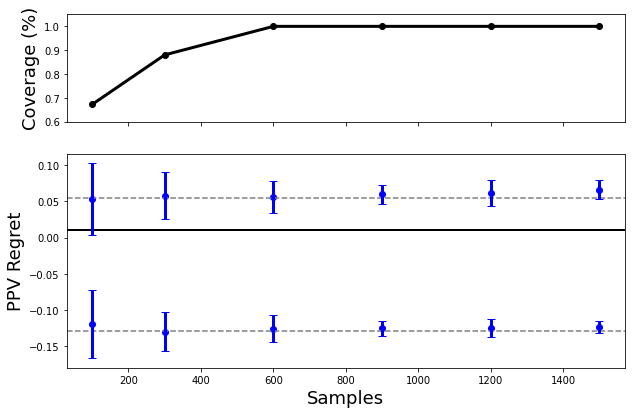

In [190]:
ns_data = experiments.get_est_exp_metadata(coveragedf, Ns)
ns_data = ns_data[ns_data['metric'] == 'm_a=1']

oracle_up = ns_data['Rd_up_oracle'].tolist()[-1]
oracle_down = ns_data['Rd_down_oracle'].tolist()[-1]
oracle = ns_data['R_oracle'].tolist()[-1]
ns_data = ns_data.iloc[:-1,:]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6.5), gridspec_kw={'height_ratios': [1,2]}, sharex=True)

# Coverage plot
samples = coveragedf[(coveragedf['est_method'] == 'plugin') & (coveragedf['metric'] == 'm_u')]
coverage = samples.groupby('N').mean()['Rd_coverage'].tolist()[:-1]
N = samples.groupby('N').mean().reset_index()['N'].tolist()[:-1]

ax1.plot(N, coverage, marker='o', color='k', linewidth=3)
ax1.set_ylabel('Coverage (%)', fontsize=18)
ax1.set_ylim(.6, 1.05)

# Interval estimation plot
ax2.axhline(oracle_up, color='grey', linestyle='--')
ax2.axhline(oracle_down, color='grey', linestyle='--')
ax2.axhline(oracle, color='k', linewidth=2,label='$R^*$')

ax2.scatter(ns_data['N'], ns_data['Rd_up_pl_mean'], color='blue')
for ix,n in enumerate(ns_data['N']):
    ax2.errorbar(n, ns_data['Rd_up_pl_mean'].tolist()[ix], yerr=ns_data['Rd_up_pl_ci'].tolist()[ix],capsize=4, linewidth=3, elinewidth=3, color='blue')

ax2.scatter(ns_data['N'], ns_data['Rd_down_pl_mean'], color='blue')
for ix,n in enumerate(ns_data['N']):
    ax2.errorbar(n, ns_data['Rd_down_pl_mean'].tolist()[ix], yerr=ns_data['Rd_down_pl_ci'].tolist()[ix],capsize=4, linewidth=3, elinewidth=3, color='blue')
    

ax2.set_xlabel('Samples', fontsize=18)
ax2.set_ylabel('PPV Regret', fontsize=18)


plt.savefig('figs/pl_estimation.pdf', dpi=500, bbox_inches='tight')



# Design sensitivity experiment 
- Delta bounds enable certifying a policy improvement up to a larger magnitude of confounding

In [8]:
Dx, Du = 5, 2
nD = Dx+Du


dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    't_coeffs': 4*np.random.rand(nD) - 3,
    'lambda': 1.5,
    'lambda_star': 1.1,
    'uniform_pi': True,
    'model': 'GB'
}

msm_dgp = set_dgp_config(dgp, 'MSM')
data = generate_data(msm_dgp)

outcome regression error: 0.06364557943271358
propensitiy error: 0.05440957597632088
outcome regression error: 0.06640826084815155
propensitiy error: 0.05512758374838222
outcome regression error: 0.06685287742086837
propensitiy error: 0.054522773365232056
outcome regression error: 0.06756063935394237
propensitiy error: 0.05212440103550335
outcome regression error: 0.06411463298318883
propensitiy error: 0.05515677065853794
outcome regression error: 0.06475030775922705
propensitiy error: 0.05452749576176744
outcome regression error: 0.06664605100160824
propensitiy error: 0.054142317986894964
outcome regression error: 0.06928929821014045
propensitiy error: 0.05513873309675847
outcome regression error: 0.06575772702395775
propensitiy error: 0.05485063010461864
outcome regression error: 0.06413945596912288
propensitiy error: 0.05627628887740885
outcome regression error: 0.06779687558274158
propensitiy error: 0.05453397200924728
outcome regression error: 0.06520122390306139
propensitiy error

outcome regression error: 0.06341916882645612
propensitiy error: 0.05383566530683255
outcome regression error: 0.06724475990033288
propensitiy error: 0.05625565048021443
outcome regression error: 0.06490912321784265
propensitiy error: 0.053224872698899986
outcome regression error: 0.06488295642871318
propensitiy error: 0.053837151939582134
outcome regression error: 0.06221155388033766
propensitiy error: 0.056809122126526446
outcome regression error: 0.0695245595429343
propensitiy error: 0.054451367836316794
outcome regression error: 0.06654717228783263
propensitiy error: 0.0538477973442111
outcome regression error: 0.06497364563957657
propensitiy error: 0.055526783779633916
outcome regression error: 0.06579027481764084
propensitiy error: 0.05467553048884515
outcome regression error: 0.06863635100525717
propensitiy error: 0.05315324236148241
outcome regression error: 0.06565250491529531
propensitiy error: 0.053181439749846376
outcome regression error: 0.0661948293976813
propensitiy erro

outcome regression error: 0.06380065215073966
propensitiy error: 0.05589801323296895
outcome regression error: 0.06531462646532442
propensitiy error: 0.055018541106797075
outcome regression error: 0.06343219483191899
propensitiy error: 0.05397829781880144
outcome regression error: 0.06641605401966294
propensitiy error: 0.05487760318376585
outcome regression error: 0.06658892013232685
propensitiy error: 0.05517569826975922
outcome regression error: 0.06330026965948471
propensitiy error: 0.05431100249540082
outcome regression error: 0.0641299904255709
propensitiy error: 0.053842846648847524
outcome regression error: 0.06214197625963962
propensitiy error: 0.053136890211897214
outcome regression error: 0.06680992275365141
propensitiy error: 0.05435880871790741
outcome regression error: 0.06480299140759939
propensitiy error: 0.056525022265316686
outcome regression error: 0.06396494536197611
propensitiy error: 0.05398571564679247
outcome regression error: 0.059166854305260905
propensitiy err

outcome regression error: 0.06479189042515233
propensitiy error: 0.0542035803420505
outcome regression error: 0.06473010264416103
propensitiy error: 0.05539357747100621
outcome regression error: 0.06574216512841234
propensitiy error: 0.05396500753902953
outcome regression error: 0.06797549301564877
propensitiy error: 0.056533161388873134
outcome regression error: 0.06338913568599233
propensitiy error: 0.05474646839850979
outcome regression error: 0.06431464994110046
propensitiy error: 0.05611337340571126
outcome regression error: 0.06546096926723388
propensitiy error: 0.057353814147449486
outcome regression error: 0.06287859969764133
propensitiy error: 0.054373702099876235
outcome regression error: 0.06724862315791871
propensitiy error: 0.054376547557441986
outcome regression error: 0.0651878321831062
propensitiy error: 0.056985880809096556
outcome regression error: 0.06673221450359787
propensitiy error: 0.058163729171787595
outcome regression error: 0.06756882994627435
propensitiy err

outcome regression error: 0.0669358703533406
propensitiy error: 0.05605686565511759
outcome regression error: 0.06332514142028332
propensitiy error: 0.05402938296696905
outcome regression error: 0.0640213457634867
propensitiy error: 0.05525762628308718
outcome regression error: 0.06482294169814475
propensitiy error: 0.05442219258503505
outcome regression error: 0.06403198669205008
propensitiy error: 0.0547813326837237
outcome regression error: 0.06489870351778881
propensitiy error: 0.05348539243431229
outcome regression error: 0.06506161471342847
propensitiy error: 0.05816323215228144
outcome regression error: 0.06729691796829226
propensitiy error: 0.05419398920263428
outcome regression error: 0.06490225703452555
propensitiy error: 0.05627664708694953
outcome regression error: 0.06328729091108731
propensitiy error: 0.05187886934364881
outcome regression error: 0.06276674144667409
propensitiy error: 0.05339554492797674
outcome regression error: 0.0670834291569234
propensitiy error: 0.05

outcome regression error: 0.06184681406887985
propensitiy error: 0.05413972257398348
outcome regression error: 0.06964466439038686
propensitiy error: 0.05297806509191607
outcome regression error: 0.06406179169535539
propensitiy error: 0.05446784516774969
outcome regression error: 0.06434762057670788
propensitiy error: 0.05453099724866583
outcome regression error: 0.06554187970014168
propensitiy error: 0.055153167357896424
outcome regression error: 0.0661563724284694
propensitiy error: 0.05552322758679448
outcome regression error: 0.06410262407990085
propensitiy error: 0.05606097505558169
outcome regression error: 0.06455257287120025
propensitiy error: 0.05363127578867333
outcome regression error: 0.061764209798278805
propensitiy error: 0.05581831339581254
outcome regression error: 0.06704839728390996
propensitiy error: 0.054235816903816375
outcome regression error: 0.0655564805989407
propensitiy error: 0.055361546593922194
outcome regression error: 0.06246174907902328
propensitiy error

outcome regression error: 0.06847816515448871
propensitiy error: 0.05745824717157345
outcome regression error: 0.0633130060730083
propensitiy error: 0.053226331788223204
outcome regression error: 0.06583359977211437
propensitiy error: 0.05414179146116344
outcome regression error: 0.06184205163950183
propensitiy error: 0.053023323583336245
outcome regression error: 0.06351612580936364
propensitiy error: 0.056402575528594956
outcome regression error: 0.06535603252850715
propensitiy error: 0.05444635822884246
outcome regression error: 0.06555290166263152
propensitiy error: 0.05561497285108591
outcome regression error: 0.0660861882589071
propensitiy error: 0.05668895184827914
outcome regression error: 0.06438312911797667
propensitiy error: 0.05730481860663014
outcome regression error: 0.06761305568730337
propensitiy error: 0.05324737503298644
outcome regression error: 0.06490608762081164
propensitiy error: 0.05370907578489244
outcome regression error: 0.06448856485574624
propensitiy error:

outcome regression error: 0.06243568470931869
propensitiy error: 0.05520695635698107
outcome regression error: 0.06441613789485598
propensitiy error: 0.05299950249627606
outcome regression error: 0.06405516304143447
propensitiy error: 0.056603766867161454
outcome regression error: 0.06644217219176493
propensitiy error: 0.053001123394937996
outcome regression error: 0.06392224302886508
propensitiy error: 0.054660003043832436
outcome regression error: 0.06513947820375976
propensitiy error: 0.056577048046348964
outcome regression error: 0.06528157204439561
propensitiy error: 0.05282942897178357
outcome regression error: 0.06768806068694985
propensitiy error: 0.052669465082084484
outcome regression error: 0.06582844455485315
propensitiy error: 0.05694800940110696
outcome regression error: 0.06542700566605594
propensitiy error: 0.05860417979869321
outcome regression error: 0.06258420251750821
propensitiy error: 0.05595996225203609
outcome regression error: 0.06551170975913487
propensitiy er

outcome regression error: 0.06469210562528571
propensitiy error: 0.05586295080526437
outcome regression error: 0.06585695519160083
propensitiy error: 0.05605324916825716
outcome regression error: 0.06308405116338098
propensitiy error: 0.053916413213433455
outcome regression error: 0.06339500934274471
propensitiy error: 0.055068022726466805
outcome regression error: 0.06105588250828348
propensitiy error: 0.05515429363315176
outcome regression error: 0.0632135177449647
propensitiy error: 0.051814399065831816
outcome regression error: 0.0679752920416047
propensitiy error: 0.05451523405966668
outcome regression error: 0.06888317634056809
propensitiy error: 0.05482321210192018
outcome regression error: 0.06525401497896613
propensitiy error: 0.0557492839720396
outcome regression error: 0.0634127335270402
propensitiy error: 0.05236381386872023
outcome regression error: 0.0685287824395587
propensitiy error: 0.05741562124456652
outcome regression error: 0.0603326147795708
propensitiy error: 0.0

outcome regression error: 0.06624474122511353
propensitiy error: 0.05366926138708765
outcome regression error: 0.06678232309307561
propensitiy error: 0.05285325208651572
outcome regression error: 0.06512428196483304
propensitiy error: 0.05380778785869218
outcome regression error: 0.06770217807620971
propensitiy error: 0.05481123074843387
outcome regression error: 0.06609002584935053
propensitiy error: 0.054666489186126474
outcome regression error: 0.0637057396103912
propensitiy error: 0.053892908566121174
outcome regression error: 0.06825392528688637
propensitiy error: 0.052289995499486853
outcome regression error: 0.06736183927025036
propensitiy error: 0.056202219584822376
outcome regression error: 0.06515849190853808
propensitiy error: 0.05561399364865176
outcome regression error: 0.06420054940373729
propensitiy error: 0.05448934156086151
outcome regression error: 0.06561292901437561
propensitiy error: 0.05450093047432695
outcome regression error: 0.0645817010430102
propensitiy error

outcome regression error: 0.06424297503113909
propensitiy error: 0.05389493513567289
outcome regression error: 0.06594545312101
propensitiy error: 0.05432564956795004
outcome regression error: 0.0658883206957116
propensitiy error: 0.0564033291153533
outcome regression error: 0.06502711673618786
propensitiy error: 0.055127446307702985
outcome regression error: 0.06366649334620163
propensitiy error: 0.05369950147702635
outcome regression error: 0.06580512260029371
propensitiy error: 0.05759136550551784
outcome regression error: 0.06822962859277436
propensitiy error: 0.05487650079977182
outcome regression error: 0.06398854937792786
propensitiy error: 0.05517955497101192
outcome regression error: 0.06552570795405935
propensitiy error: 0.05528962514367207
outcome regression error: 0.0634685329278578
propensitiy error: 0.05392123983073381
outcome regression error: 0.0680389684613023
propensitiy error: 0.0558049058243347
outcome regression error: 0.06350518829193401
propensitiy error: 0.05361

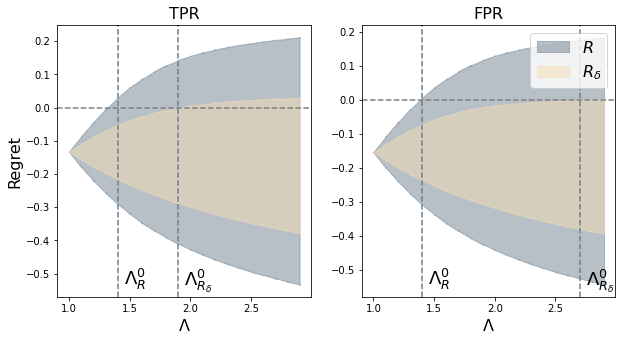

In [9]:
lambdas = np.arange(1, 3, .1)
brdf = experiments.design_sensitivity_exp(dgp, data, lambdas, n_sims=10)
plots.plot_design_sensitivity(brdf)

# Experiment: Exclusion restriction violation tests

outcome regression error: 0.07405556141680375
propensitiy error: 0.013926949946831203
outcome regression error: 0.07563662137910901
propensitiy error: 0.014856479133708467
outcome regression error: 0.0747949850715846
propensitiy error: 0.014348330762460866
outcome regression error: 0.07448611278702509
propensitiy error: 0.01379395568036903
outcome regression error: 0.07403721047891929
propensitiy error: 0.014036916899094996
outcome regression error: 0.07506024481431482
propensitiy error: 0.014978514145617685
outcome regression error: 0.07414625655532556
propensitiy error: 0.015449477947186804
outcome regression error: 0.07479139599207184
propensitiy error: 0.015378962799801785
outcome regression error: 0.07412320282122628
propensitiy error: 0.014597008735188962
outcome regression error: 0.07601019631175221
propensitiy error: 0.015144504586683701
outcome regression error: 0.07752963017263942
propensitiy error: 0.015532419241855078
outcome regression error: 0.07561817452055804
propensiti

outcome regression error: 0.07641626280323112
propensitiy error: 0.014231705090398403
outcome regression error: 0.07552687541219337
propensitiy error: 0.016383984626497417
outcome regression error: 0.07688139871694759
propensitiy error: 0.014327436649894476
outcome regression error: 0.07863957662837345
propensitiy error: 0.014847357743879581
outcome regression error: 0.07498621429935817
propensitiy error: 0.013482568374459812
outcome regression error: 0.07486027397339658
propensitiy error: 0.01470347955679621
outcome regression error: 0.07514550430640866
propensitiy error: 0.014081154165121536
outcome regression error: 0.07500345244170811
propensitiy error: 0.01438715090513517
outcome regression error: 0.07461499169947115
propensitiy error: 0.014809584541138518
outcome regression error: 0.07658049158631765
propensitiy error: 0.014071270144746182
outcome regression error: 0.07478331322833762
propensitiy error: 0.014339755833703397
outcome regression error: 0.07694191603530633
propensiti

outcome regression error: 0.07624440554734371
propensitiy error: 0.014503396747568469
outcome regression error: 0.07583881636775469
propensitiy error: 0.013553413371652006
outcome regression error: 0.07752532173529471
propensitiy error: 0.014292145842240327
outcome regression error: 0.07589136199081138
propensitiy error: 0.013579145410598951
outcome regression error: 0.07574584329247298
propensitiy error: 0.013754196407821554
outcome regression error: 0.07466226955312279
propensitiy error: 0.01529752885475158
outcome regression error: 0.0747151669040217
propensitiy error: 0.014833572777855743
outcome regression error: 0.07533410384162866
propensitiy error: 0.015958601062359242
outcome regression error: 0.07515441249836874
propensitiy error: 0.0144708289049542
outcome regression error: 0.07445775421182899
propensitiy error: 0.014605011108960448
outcome regression error: 0.07611829772923763
propensitiy error: 0.014253569195482919
outcome regression error: 0.07651216837336278
propensitiy 

outcome regression error: 0.07582115209090846
propensitiy error: 0.014994402784254346
outcome regression error: 0.07470376356062544
propensitiy error: 0.014532592266882924
outcome regression error: 0.07371040459419735
propensitiy error: 0.01582560010005657
outcome regression error: 0.07504895733932683
propensitiy error: 0.015543260786550966
outcome regression error: 0.07528128998758041
propensitiy error: 0.014795004330931694
outcome regression error: 0.0748497123691248
propensitiy error: 0.014553199047749456
outcome regression error: 0.07519613423652959
propensitiy error: 0.015496868039787094
outcome regression error: 0.07251494584902048
propensitiy error: 0.014725403744286998
outcome regression error: 0.07548676747785624
propensitiy error: 0.014625819978133593
outcome regression error: 0.07622950518133424
propensitiy error: 0.014659858376464524
outcome regression error: 0.0772682014496231
propensitiy error: 0.014116804457851281
outcome regression error: 0.07703043226089179
propensitiy

outcome regression error: 0.07468148697413972
propensitiy error: 0.014017152173531385
outcome regression error: 0.07415682255804992
propensitiy error: 0.015077007739711537
outcome regression error: 0.07751422253059066
propensitiy error: 0.015197704352361587
outcome regression error: 0.0729735628644036
propensitiy error: 0.01356262504126051
outcome regression error: 0.0747441456406263
propensitiy error: 0.01651182602624927
outcome regression error: 0.07566243347229931
propensitiy error: 0.014169273265798617
outcome regression error: 0.0759690902251509
propensitiy error: 0.013304834148388935
outcome regression error: 0.0757396752320451
propensitiy error: 0.013355371228015504
outcome regression error: 0.07453527440070702
propensitiy error: 0.013247203623198305
outcome regression error: 0.07318721024297059
propensitiy error: 0.01306808655921187
outcome regression error: 0.07633824221404509
propensitiy error: 0.014072409540873757
outcome regression error: 0.07507852596200684
propensitiy err

outcome regression error: 0.07537094949532548
propensitiy error: 0.01442037460561518
outcome regression error: 0.07313769615586929
propensitiy error: 0.01445602217929999
outcome regression error: 0.07447741969677156
propensitiy error: 0.013672073740549904
outcome regression error: 0.07522599499731211
propensitiy error: 0.014028257416651323
outcome regression error: 0.07571187448978658
propensitiy error: 0.015303062018740946
outcome regression error: 0.07572112646694959
propensitiy error: 0.013341045308180697
outcome regression error: 0.07443916219859574
propensitiy error: 0.013789016932292356
outcome regression error: 0.07324450166753829
propensitiy error: 0.014815805250963399
outcome regression error: 0.07558961094019916
propensitiy error: 0.014364281377103686
outcome regression error: 0.07771623066017283
propensitiy error: 0.013350205627963824
outcome regression error: 0.07544342962362229
propensitiy error: 0.01643149968009301
outcome regression error: 0.07465663276013709
propensitiy

outcome regression error: 0.07403494927051221
propensitiy error: 0.014785078860033324
outcome regression error: 0.0744641091990432
propensitiy error: 0.014259853825619537
outcome regression error: 0.0748761721158721
propensitiy error: 0.013732918768726402
outcome regression error: 0.0744076948715826
propensitiy error: 0.015583063988989359
outcome regression error: 0.07529977885500487
propensitiy error: 0.01523668392372456
outcome regression error: 0.07396614895357036
propensitiy error: 0.015435465249134818
outcome regression error: 0.07484444380617776
propensitiy error: 0.015325142424141625
outcome regression error: 0.07330444136384416
propensitiy error: 0.01495422679300275
outcome regression error: 0.07470593101816778
propensitiy error: 0.01694436727251398
outcome regression error: 0.07324573834233769
propensitiy error: 0.014079612652599804
outcome regression error: 0.07277133592991364
propensitiy error: 0.014266389179844026
outcome regression error: 0.07268826648847082
propensitiy er

outcome regression error: 0.07564367431896822
propensitiy error: 0.014664900643331816
outcome regression error: 0.07481618737363613
propensitiy error: 0.014554791136177298
outcome regression error: 0.0753374185772646
propensitiy error: 0.01447292668637605
outcome regression error: 0.07395532604090567
propensitiy error: 0.013865981022358793
outcome regression error: 0.07446636391454119
propensitiy error: 0.014302792438657277
outcome regression error: 0.07324634909764365
propensitiy error: 0.014081425691477065
outcome regression error: 0.0722330655502631
propensitiy error: 0.013675910184394421
outcome regression error: 0.07504553869519373
propensitiy error: 0.014978525793143174
outcome regression error: 0.07451343575014582
propensitiy error: 0.01555009292517197
outcome regression error: 0.07372752219999748
propensitiy error: 0.014065729818793705
outcome regression error: 0.07523136617912293
propensitiy error: 0.014406059881997073
outcome regression error: 0.07411078239085486
propensitiy 

outcome regression error: 0.07313425302651891
propensitiy error: 0.01473886282674405
outcome regression error: 0.07428147754536892
propensitiy error: 0.013991821400861004
outcome regression error: 0.07379975698028123
propensitiy error: 0.013815850225085264
outcome regression error: 0.07351648522943899
propensitiy error: 0.013330463961963392
outcome regression error: 0.07132431298976234
propensitiy error: 0.014213092219325566
outcome regression error: 0.07396833577484563
propensitiy error: 0.013781805920583078
outcome regression error: 0.0745091565383029
propensitiy error: 0.01401000492257306
outcome regression error: 0.07421543390935827
propensitiy error: 0.01428222692862478
outcome regression error: 0.07427797484555396
propensitiy error: 0.013971199199120597
outcome regression error: 0.07313313912134253
propensitiy error: 0.015216615118930911
outcome regression error: 0.0727168904995392
propensitiy error: 0.016207475692934577
outcome regression error: 0.07403954077933646
propensitiy e

outcome regression error: 0.0711703167429511
propensitiy error: 0.01417029893322961
outcome regression error: 0.07305139265060132
propensitiy error: 0.014832038604961207
outcome regression error: 0.07348748845609211
propensitiy error: 0.014568009048752554
outcome regression error: 0.07292471400059884
propensitiy error: 0.014127957847642597
outcome regression error: 0.0725939159943198
propensitiy error: 0.014120722721786159
outcome regression error: 0.07333802577403424
propensitiy error: 0.014599298976474185
outcome regression error: 0.07263497198416062
propensitiy error: 0.016270354753496943
outcome regression error: 0.07065975801772484
propensitiy error: 0.015962870661184753
outcome regression error: 0.07299685321320769
propensitiy error: 0.01507823275102692
outcome regression error: 0.07214082670768358
propensitiy error: 0.016064758162732822
outcome regression error: 0.07214798578019996
propensitiy error: 0.01495716429336942
outcome regression error: 0.07207250578214944
propensitiy e

outcome regression error: 0.07130894374822619
propensitiy error: 0.014254524704747364
outcome regression error: 0.07175004878331626
propensitiy error: 0.015535772162907809
outcome regression error: 0.07263269049242854
propensitiy error: 0.015108025449922425
outcome regression error: 0.07198508691162382
propensitiy error: 0.015637599875864352
outcome regression error: 0.07069598875876584
propensitiy error: 0.014810596703438112
outcome regression error: 0.07205430226706502
propensitiy error: 0.014897009426800022
outcome regression error: 0.07212397853461033
propensitiy error: 0.014650120960751661
outcome regression error: 0.07166455588255152
propensitiy error: 0.015307140513265597
outcome regression error: 0.07060950803990224
propensitiy error: 0.01469902584765449
outcome regression error: 0.07170170773478247
propensitiy error: 0.01461475255071065
outcome regression error: 0.07107608563702082
propensitiy error: 0.01377823199865871
outcome regression error: 0.0709213124808102
propensitiy 

outcome regression error: 0.07399404236695403
propensitiy error: 0.014663785637535202
outcome regression error: 0.07397101334066465
propensitiy error: 0.01477393307350458
outcome regression error: 0.0716102659541389
propensitiy error: 0.014765400297076754
outcome regression error: 0.07291462888520439
propensitiy error: 0.015369958847643979
outcome regression error: 0.07260814687755729
propensitiy error: 0.01482388648364324
outcome regression error: 0.07085483829382692
propensitiy error: 0.015412062241864486
outcome regression error: 0.07161413965923774
propensitiy error: 0.014721555337042794
outcome regression error: 0.07022401898172077
propensitiy error: 0.014739625974281292
outcome regression error: 0.07118430174630218
propensitiy error: 0.014843682908322074
outcome regression error: 0.0700405912610483
propensitiy error: 0.016362680124698614
outcome regression error: 0.0697782023508737
propensitiy error: 0.014279046759112133
outcome regression error: 0.0692064042942818
propensitiy er

outcome regression error: 0.06997542629088324
propensitiy error: 0.014086645096098138
outcome regression error: 0.07094173698273681
propensitiy error: 0.014015324294539716
outcome regression error: 0.07125505124743557
propensitiy error: 0.01415538910017449
outcome regression error: 0.06981915176348924
propensitiy error: 0.013921486417043171
outcome regression error: 0.07125447971416742
propensitiy error: 0.014256626997079245
outcome regression error: 0.07257666632654565
propensitiy error: 0.016290571406514735
outcome regression error: 0.07179026516184774
propensitiy error: 0.016213994709974505
outcome regression error: 0.07139049291075364
propensitiy error: 0.015356886178759327
outcome regression error: 0.07184159671692199
propensitiy error: 0.01580872418033027
outcome regression error: 0.0723917745929013
propensitiy error: 0.016289571444926786
outcome regression error: 0.07056407459770522
propensitiy error: 0.015343202558559836
outcome regression error: 0.07107677532584637
propensitiy

outcome regression error: 0.06963310912876443
propensitiy error: 0.013873628603452787
outcome regression error: 0.07119183703978309
propensitiy error: 0.01480771564716435
outcome regression error: 0.07131042956287564
propensitiy error: 0.01531237885738033
outcome regression error: 0.07098767206989888
propensitiy error: 0.013885815234353348
outcome regression error: 0.07143829768866528
propensitiy error: 0.01432764797086242


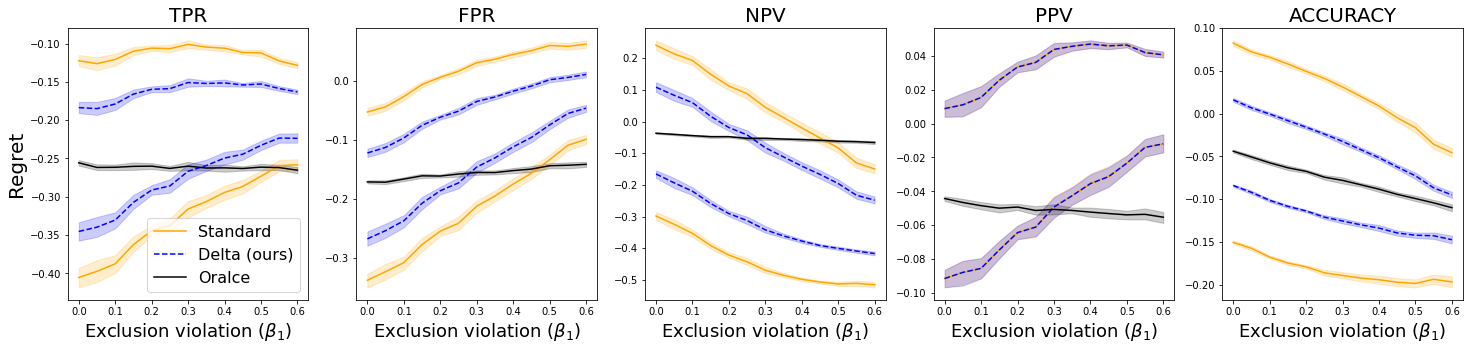

In [19]:
lambdas = np.arange(1, 2.6, .1)
Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 20000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    't_coeffs': 4*np.random.rand(nD) - 3,
    'lambda_star': 1.7,
    'id_assumption': 'IV',
    'model': 'LR'
}

dgp = set_dgp_config(dgp, 'IV')
dgp['beta_zd'] = 1.25
beta_zy = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, .5, .55, .6]
bedf = experiments.exclusion_sensitivity_experiment(dgp, beta_zy, n_sims=20, est_method='plugin', K=5)
plots.plot_exclusion_sensitivity(bedf, 'figs/exclusion_sensitivity.pdf')

# Experiment: Relevance violation tests

outcome regression error: 0.09490895841509933
propensitiy error: 0.035327703720406445
outcome regression error: 0.09518411090874421
propensitiy error: 0.03563476627893854
outcome regression error: 0.09313914313652251
propensitiy error: 0.03475039190046469
outcome regression error: 0.0936427006708969
propensitiy error: 0.035328878695895044
outcome regression error: 0.09386182110850919
propensitiy error: 0.03498062693371
outcome regression error: 0.0959634665494734
propensitiy error: 0.03618407665419791
outcome regression error: 0.09701113313488119
propensitiy error: 0.03654373704545172
outcome regression error: 0.09724250167478063
propensitiy error: 0.03704919927503096
outcome regression error: 0.09759425201157061
propensitiy error: 0.03585796562021156
outcome regression error: 0.09693762432066476
propensitiy error: 0.03664158555946895
outcome regression error: 0.0981716243251941
propensitiy error: 0.03612980154377044
outcome regression error: 0.09512126258660791
propensitiy error: 0.03

outcome regression error: 0.09651751368179205
propensitiy error: 0.03553845386175587
outcome regression error: 0.09718108911680885
propensitiy error: 0.03519856844229238
outcome regression error: 0.09639481315824977
propensitiy error: 0.0353431062652282
outcome regression error: 0.09486789074994752
propensitiy error: 0.03490366313273758
outcome regression error: 0.09554223404891138
propensitiy error: 0.03434362231035814
outcome regression error: 0.09662647238821062
propensitiy error: 0.03574226490787808
outcome regression error: 0.09674034119607794
propensitiy error: 0.03531362894860741
outcome regression error: 0.09568200200403378
propensitiy error: 0.03450861178649865
outcome regression error: 0.09670496576596523
propensitiy error: 0.03602174408187527
outcome regression error: 0.09543077763656804
propensitiy error: 0.03479913678073583
outcome regression error: 0.09985174307589911
propensitiy error: 0.03560433964101454
outcome regression error: 0.09585031714905776
propensitiy error: 0

outcome regression error: 0.09416354785712319
propensitiy error: 0.03149570079228183
outcome regression error: 0.09586620318199994
propensitiy error: 0.03236710543042041
outcome regression error: 0.09399259079200763
propensitiy error: 0.032312601374116894
outcome regression error: 0.09590880433924316
propensitiy error: 0.03256136560821731
outcome regression error: 0.09509229402430684
propensitiy error: 0.03263567549110208
outcome regression error: 0.0948372896184795
propensitiy error: 0.03212968486637597
outcome regression error: 0.09626122478332932
propensitiy error: 0.032599494487359534
outcome regression error: 0.09579679189574514
propensitiy error: 0.03152075768114064
outcome regression error: 0.09690845296773204
propensitiy error: 0.03254239772296339
outcome regression error: 0.09664419248384429
propensitiy error: 0.032625508756530926
outcome regression error: 0.09416135417545445
propensitiy error: 0.0330178348846079
outcome regression error: 0.09640122378367388
propensitiy error:

outcome regression error: 0.09640515128854785
propensitiy error: 0.02770133958765916
outcome regression error: 0.09400073046054985
propensitiy error: 0.02748909766450517
outcome regression error: 0.09727469187500234
propensitiy error: 0.02804579403960246
outcome regression error: 0.09692857784283558
propensitiy error: 0.02786323663534917
outcome regression error: 0.09629138925984884
propensitiy error: 0.02729998012989458
outcome regression error: 0.09265953481461264
propensitiy error: 0.027672881286676755
outcome regression error: 0.09387869661633023
propensitiy error: 0.028372882612088056
outcome regression error: 0.0935200362835308
propensitiy error: 0.02802898442308011
outcome regression error: 0.09414315057044359
propensitiy error: 0.028297335570742547
outcome regression error: 0.09422062616736634
propensitiy error: 0.028484394336573206
outcome regression error: 0.09431879816173844
propensitiy error: 0.026693706958458505
outcome regression error: 0.0963946185885247
propensitiy erro

outcome regression error: 0.09593286505360689
propensitiy error: 0.026443321719288298
outcome regression error: 0.0970751709086374
propensitiy error: 0.025025002854856
outcome regression error: 0.09682760598040838
propensitiy error: 0.02510250081914217
outcome regression error: 0.09467349740659523
propensitiy error: 0.024901059557842952
outcome regression error: 0.09687445109013469
propensitiy error: 0.025323788208976836
outcome regression error: 0.09586374421024868
propensitiy error: 0.024781793843312045
outcome regression error: 0.09360045776525026
propensitiy error: 0.02363843496791634
outcome regression error: 0.09518447411925018
propensitiy error: 0.02343722964980721
outcome regression error: 0.09611651465402823
propensitiy error: 0.023892514529745945
outcome regression error: 0.09576830622804686
propensitiy error: 0.02402038070198649
outcome regression error: 0.09644710395471481
propensitiy error: 0.02393071773648379
outcome regression error: 0.09438854322261793
propensitiy error

outcome regression error: 0.09312693933055402
propensitiy error: 0.020347776998603927
outcome regression error: 0.09519285660865057
propensitiy error: 0.020973669625648686
outcome regression error: 0.09457237339190806
propensitiy error: 0.02064865358771818
outcome regression error: 0.09793166400469089
propensitiy error: 0.021357673871865383
outcome regression error: 0.09365405381307872
propensitiy error: 0.01961464417260796
outcome regression error: 0.09456322028576902
propensitiy error: 0.019802885884732797
outcome regression error: 0.09467950677534076
propensitiy error: 0.019648450449430033
outcome regression error: 0.09628670678585843
propensitiy error: 0.02007673261589573
outcome regression error: 0.09362669865631955
propensitiy error: 0.02013991399832411
outcome regression error: 0.09415739401636689
propensitiy error: 0.020120740650535124
outcome regression error: 0.09701250429322175
propensitiy error: 0.020914396230593997
outcome regression error: 0.09772524178475359
propensitiy 

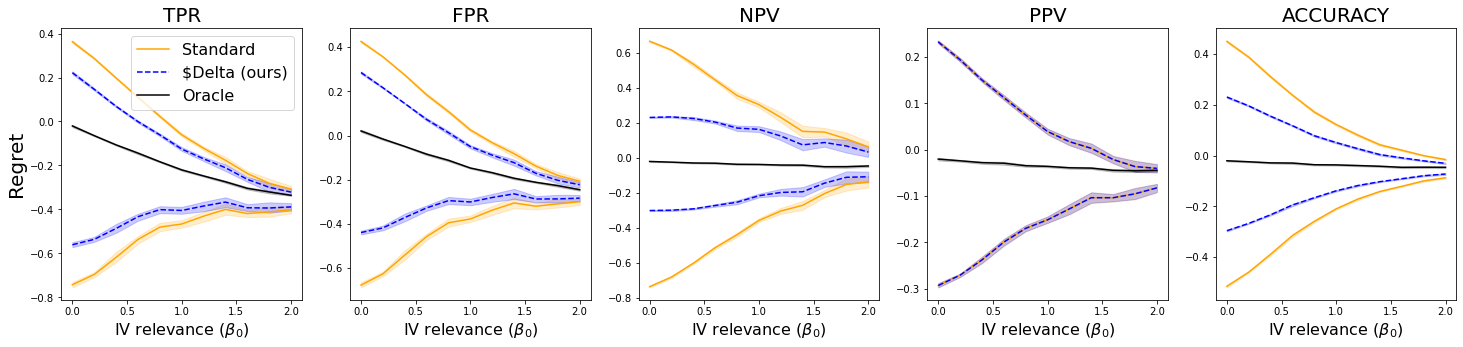

In [11]:
lambdas = np.arange(1, 2.6, .1)
Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 20000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    't_coeffs': 4*np.random.rand(nD) - 3,
    'lambda': 1.5,
    'lambda_star': 1.7,
    'id_assumption': 'IV',
    'model': 'LR'
}

iv_dgp = set_dgp_config(dgp, 'IV')
beta_zd = [0, .2, .4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
brdf = experiments.relevance_sensitivity_experiment(iv_dgp, beta_zd, n_sims=10)
plots.plot_relevance_sensitivity(brdf, 'figs/relevance_iv.pdf')

## Robustness check: MSM $\Lambda$ coverage

In [9]:
Nsims = 10
Dx, Du = 5, 2
nD = Dx+Du

dgp = {
    'N': 10000,
    'Dx': Dx,
    'Du': Du,
    'nz': 10,                # Number of finite pre-treatment values
    'beta_zy': 0,            # Z -> Y loading (=0 ==> exclusion restriction is satisfied)
    'e1_coeffs': 4*np.random.rand(nD) - 2,
    'z_coeffs':  4*np.random.rand(nD) - 2,
    'mu1_coeffs': 4*np.random.rand(nD) - 1,
    'mu0_coeffs': 4*np.random.rand(nD) - 2,
    't_coeffs': 4*np.random.rand(nD) - 3,
    'lambda': 1.4,
    'id_assumption': 'MSM',
    'model': 'LR'
}

msm_dgp = set_dgp_config(dgp, 'MSM')
lambda_star = [0, .2, .4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4]
brdf = experiments.msm_sensitivity_experiment(msm_dgp, lambda_star, n_sims=10)
plots.plot_msm_sensitivity(msm_dgp, brdf, path='figs/msm_assumption.pdf')


outcome regression error: 0.026323010050762576
propensitiy error: 0.07086836544317714
outcome regression error: 0.027194276965558026
propensitiy error: 0.07014838013908718
outcome regression error: 0.026264207504293015
propensitiy error: 0.06834742848819178
outcome regression error: 0.02655017027179771
propensitiy error: 0.07301018193108541
outcome regression error: 0.029684599802576473
propensitiy error: 0.07247678038629468
outcome regression error: 0.027100573449685014
propensitiy error: 0.07048286971515998
outcome regression error: 0.026129482540858475
propensitiy error: 0.07117431620059744
outcome regression error: 0.025066513371179745
propensitiy error: 0.07245231242047373
outcome regression error: 0.026347274504049407
propensitiy error: 0.07121070040868616
outcome regression error: 0.028782334333211878
propensitiy error: 0.06971129202083685
outcome regression error: 0.02500776038566562
propensitiy error: 0.07150436614649121
outcome regression error: 0.029463340675465917
propensit

outcome regression error: 0.031634694104385803
propensitiy error: 0.06891687297167451
outcome regression error: 0.023954678870905754
propensitiy error: 0.07020334499306422
outcome regression error: 0.02678010623146841
propensitiy error: 0.0707924388567117
outcome regression error: 0.027848850413326437
propensitiy error: 0.06828798742447234
outcome regression error: 0.02746901118515676
propensitiy error: 0.07218286922547393
outcome regression error: 0.028869102313745874
propensitiy error: 0.06965692379125644
outcome regression error: 0.028127177061180095
propensitiy error: 0.07127793097600994
outcome regression error: 0.028118403784775745
propensitiy error: 0.07080942875199256
outcome regression error: 0.031707619116185096
propensitiy error: 0.0726563950248788
outcome regression error: 0.027812634612655544
propensitiy error: 0.0709099862881449
outcome regression error: 0.031754284846594184
propensitiy error: 0.07274724926022352
outcome regression error: 0.02424160514307951
propensitiy e

KeyboardInterrupt: 

## Combined experimental results 

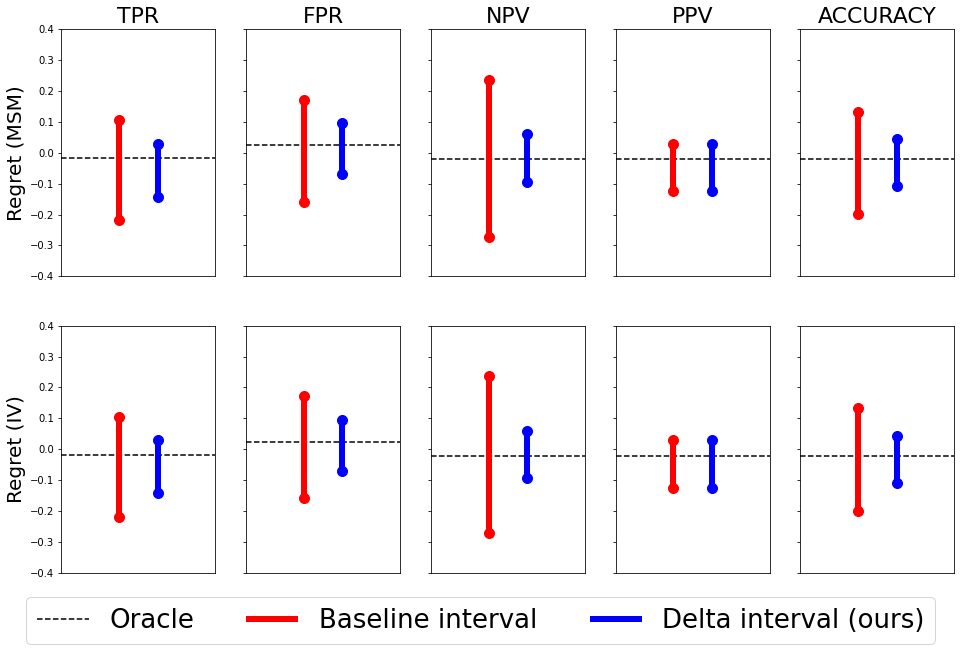

In [191]:
def plot_intervals(df, metrics, ix_y):
    
    metric_dict = {
        'm_y=1': 'TPR',
        'm_y=0': 'FPR',
        'm_a=0': 'NPV',
        'm_a=1': 'PPV',
        'm_u': 'ACCURACY',
    }

    for i, metric in enumerate(metrics):

        # Filter the DataFrame for the current metric
        mdf = df[df['metric'] == metric]

        # Calculate the means
        mean_rs_down = mdf['Rs_down'].mean()
        mean_rs_up = mdf['Rs_up'].mean()
        mean_rd_down = mdf['Rd_down'].mean()
        mean_rd_up = mdf['Rd_up'].mean()
        oracle = mdf['R_oracle'].mean()
        
        axes[ix_y][i].axhline(oracle, color='k', linestyle='--', label='Oracle')

        # Draw a vertical line from mean_rs_down to mean_rs_up at x = 0.5 (for example)
        axes[ix_y][i].vlines(x=.1, ymin=mean_rs_down, ymax=mean_rs_up, color='r',
                       linestyle='-', label='Baseline interval', linewidth=6)

        # Draw a vertical line from mean_rd_down to mean_rd_up at x = 1.5 (for example)
        axes[ix_y][i].vlines(x=.2, ymin=mean_rd_down, ymax=mean_rd_up, color='b',
                       linestyle='-', label='Delta interval (ours)', linewidth=6)

        # Add markers to the endpoints of the first line
        axes[ix_y][i].plot(.1, mean_rs_down, 'ro', markersize=10)  
        axes[ix_y][i].plot(.1, mean_rs_up, 'ro', markersize=10)

        # Add markers to the endpoints of the second line
        axes[ix_y][i].plot(.2, mean_rd_down, 'bo', markersize=10) 
        axes[ix_y][i].plot(.2, mean_rd_up, 'bo', markersize=10)    
        axes[ix_y][i].set_xlim(-.05, .35)  # Set the x-limits to frame our lines nicely
        axes[ix_y][i].set_ylim(-.4, .4)

        # Remove x-tick labels
        axes[ix_y][i].set_xticks([])

        # If you also want to remove the x-tick lines (ticks themselves), use the following:
        axes[ix_y][i].tick_params(axis='x', which='both', length=0)
        
        if ix_y == 0:
            axes[ix_y][i].set_title(metric_dict[metric], fontsize=22)
            

ivdf = pd.read_csv('results/iv_relevance_df_GB_K5_N20.csv')
msmdf = pd.read_csv('results/msm_assumption_df_GB_NS20_L14.csv')

msmdf = msmdf[msmdf['ls'] == 1.2]
iv_results = ivdf[ivdf['beta_zy'] == .2]

metrics = ivdf['metric'].unique().tolist()
fig, axes = plt.subplots(2, 5, figsize=(16, 10), sharey=True)

axes[0][0].set_ylabel(f'Regret (MSM)', fontsize=20)
axes[1][0].set_ylabel(f'Regret (IV)', fontsize=20)

plot_intervals(msmdf, metrics, 0)
plot_intervals(msmdf, metrics, 1)

# axes[0][i].legend(fontsize=14, loc='upper right')

handles, labels = [], []
for ax in axes.flatten():
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:  # check to avoid duplicate entries
            handles.append(handle)
            labels.append(label)

fig.legend(handles, labels, fontsize=26, loc='lower center', ncol=3)
plt.savefig('figs/delta_standard_comparison.pdf')


In [28]:
pd.read_csv('results/iv_relevance_df_GB_K5_N20.csv')

,Unnamed: 0,Rs_down,Rs_up,Rd_down,Rd_up,Rs_coverage,Rd_coverage,R_oracle,metric,id_method,est_method,beta_zy
0,0,-0.427531,-0.118521,-0.366322,-0.181567,1.0,1.0,-0.261070,m_y=1,IV,plugin,0.0
1,1,-0.346359,-0.036232,-0.272307,-0.109414,1.0,1.0,-0.167115,m_y=0,IV,plugin,0.0
2,2,-0.320679,0.253348,-0.182308,0.114977,1.0,1.0,-0.046973,m_a=0,IV,plugin,0.0
3,3,-0.107714,0.008700,-0.107714,0.008700,1.0,1.0,-0.047350,m_a=1,IV,plugin,0.0
4,4,-0.167988,0.087088,-0.097883,0.016983,1.0,1.0,-0.046100,m_u,IV,plugin,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0,-0.251695,-0.150272,-0.226850,-0.175230,0.2,0.0,-0.256435,m_y=1,IV,plugin,0.6
1296,1,-0.089011,0.036511,-0.050972,-0.001187,0.0,0.0,-0.145604,m_y=0,IV,plugin,0.6
1297,2,-0.441019,-0.167608,-0.370310,-0.238317,0.0,0.0,-0.068171,m_a=0,IV,plugin,0.6
1298,3,-0.022620,0.022728,-0.022620,0.022728,0.0,0.0,-0.046528,m_a=1,IV,plugin,0.6


In [31]:
pd.read_csv('results/iv_relevance_df_GB_K5_N20.csv')

,Unnamed: 0,Rs_down,Rs_up,Rd_down,Rd_up,Rs_coverage,Rd_coverage,R_oracle,metric,id_method,est_method,beta_zy
0,0,-0.427531,-0.118521,-0.366322,-0.181567,1.0,1.0,-0.261070,m_y=1,IV,plugin,0.0
1,1,-0.346359,-0.036232,-0.272307,-0.109414,1.0,1.0,-0.167115,m_y=0,IV,plugin,0.0
2,2,-0.320679,0.253348,-0.182308,0.114977,1.0,1.0,-0.046973,m_a=0,IV,plugin,0.0
3,3,-0.107714,0.008700,-0.107714,0.008700,1.0,1.0,-0.047350,m_a=1,IV,plugin,0.0
4,4,-0.167988,0.087088,-0.097883,0.016983,1.0,1.0,-0.046100,m_u,IV,plugin,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1295,0,-0.251695,-0.150272,-0.226850,-0.175230,0.2,0.0,-0.256435,m_y=1,IV,plugin,0.6
1296,1,-0.089011,0.036511,-0.050972,-0.001187,0.0,0.0,-0.145604,m_y=0,IV,plugin,0.6
1297,2,-0.441019,-0.167608,-0.370310,-0.238317,0.0,0.0,-0.068171,m_a=0,IV,plugin,0.6
1298,3,-0.022620,0.022728,-0.022620,0.022728,0.0,0.0,-0.046528,m_a=1,IV,plugin,0.6
